In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Numerical Integration 1

11 11


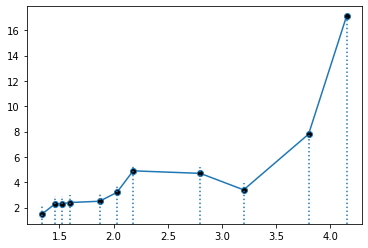

In [19]:
#given x and y value
x=[1.34, 1.46, 1.52, 1.6, 1.87, 2.03, 2.18, 2.8, 3.2, 3.8, 4.15]
y=[1.5, 2.3, 2.3, 2.4, 2.5, 3.2, 4.9, 4.7, 3.4, 7.8, 17.1]


# plotting the points, just to visualise
plt.plot(x,y,marker="o",markerfacecolor="k")
for i in range(11):
    plt.axvline(x[i],ymin=0,ymax=y[i]/18,linestyle=":")
print(len(x),len(y))

In [20]:
# calculating area below the curve by taking summation of area of successive trapezoids
Area=0

for i in range(10):
    Area=Area+1/2*(y[i]+y[i+1])*(x[i+1]-x[i])

    
print(Area)

14.592500000000005


# Numerical Integration 2

In [21]:
# defining given functions
def func(x):
    y=x**2
    return y

def func1(x):
    y=np.sin(x)
    return y

def func2(x):
    y=((np.sin(x))/x)**2
    return y

In [71]:
#defining trapezoidal rule, four inputs of the trapezoidal method are the funtion we want to integrate,
#the lower limit, the uper limit and the number of divisions we are making in order to approximate the 
#area of the plot respectively.
def trap(f,a,b,N):
    
    x=np.linspace(a,b,N)
    y=f(x)
    A=0
    
    for i in range(N-1):
        A= A + 1/2*(x[i+1]-x[i])*(y[i+1]+y[i])
        
    return A

#Applying the trapezoidal rule on three defined functions, with just 10 divisions between lower and upper limit         
print(trap(func,-1,1,10))
print(trap(func1,0,math.pi,10))
print(trap(func2,10**(-11),100,100))
    

0.6831275720164609
1.9796508112164835
1.5658102595018637


In [72]:
#defining simpson's rule of numerical integration, four inputs of the simpsons method are the funtion 
#we want to integrate, the lower limit, the uper limit and the number of divisions we are making 
#in order to approximate the area of the plot respectively.
def simp(f,a,b,N):
    
    x= np.linspace(a,b,N)
    y= f(x)
    A= 0
    
    for i in range(N-1):
        A= A + (((x[i+1]-x[i])/6)*(f(x[i])+f(x[i+1])+4*f((x[i]+x[i+1])/2)))
    
    
    return A
#Applying the simpson's rule on three defined functions, with just 10 divisions between lower and upper limit         
print(simp(func,-1,1,10))
print(simp(func1,0,math.pi,10))
print(simp(func2,10**(-11),100,100))

0.6666666666666666
2.0000103477057745
1.5658184184414374


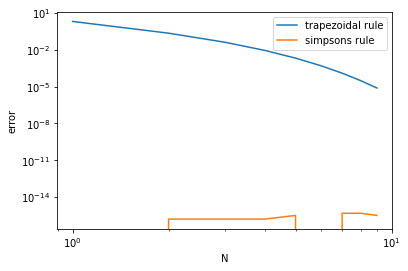

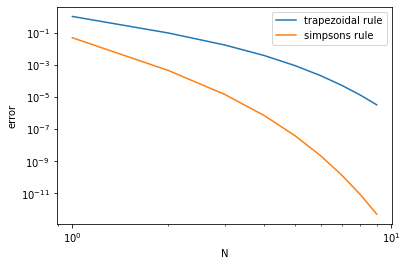

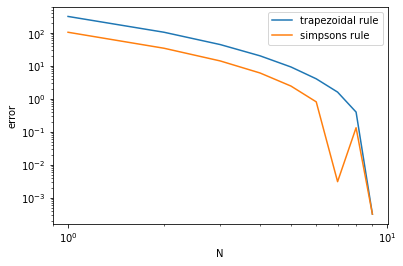

In [73]:
# this function calculates and plots error in areas by trapezoidal and simpson rule for 
#the three of the above defined functions with powers of 2 to see how the vary with no. of divisions 
# we make between the upper and lower limits
def errorplot(f,a,b,Y_an):
    eT=[]
    eS=[]
    for i in range(1,10):
        t=trap(f,a,b,2**(i))
        s=simp(f,a,b,2**(i))
        et=np.abs((Y_an-t)/Y_an)
        es=np.abs((Y_an-s)/Y_an)
        eT.append(et)
        eS.append(es)
    
    n=np.linspace(1,9,9)
    
    plt.plot(n,eT)
    plt.plot(n,eS)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(["trapezoidal rule","simpsons rule"])
    plt.xlabel("N")
    plt.ylabel("error")
    plt.show()
    
    return 

errorplot(func,-1,1,2/3)
errorplot(func1,0,math.pi,2)
errorplot(func2,10**(-16),1000,math.pi/2)


In [79]:
# defining T = ∫√2m/(√E − V(x))dx for unit m.
def f(x,E,V):
    return np.sqrt((2)/(E-V(x)))

#defining trapezoidal method for area under above f for different V(x)
def tr(f,a,e,E,N,V):
    
    x=np.linspace(-a+e,a-e,N)
    y=f(x,E,V)
    A=0
    
    for i in range(N-1):
        A= A + 1/2*(x[i+1]-x[i])*(y[i+1]+y[i])
        
    return A

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10]


Text(0, 0.5, 'T')

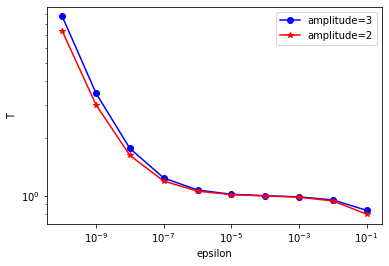

In [81]:
# defining potential for harmonic oscillator
def V(x):
    return 2*math.pi**2*x**2


e=np.zeros(10)
for i in range(10):
    e[i]=10**(-1-i)
print(e)
    
T1=tr(f,3,e,18*math.pi**2,10000,V)  # area varying with epsilon values for amplitude =3
T2=tr(f,2,e,8*math.pi**2,10000,V)   # area varying with epsilon values for amplitude =2
plt.plot(e,T1,"bo-")
plt.plot(e,T2,"r*-")
plt.legend(["amplitude=3","amplitude=2"])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("epsilon")
plt.ylabel("T")

Text(0, 0.5, 'error wrt expected value')

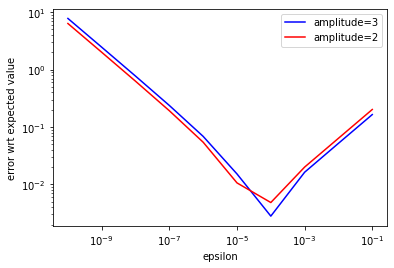

In [77]:
ones=np.ones(10)  #expected value of T can be calculated to be equal to 1
e1=np.abs(ones-T1)
e2=np.abs(ones-T2)
plt.plot(e,e1,"b-") #deviation of area from expected values for different epsilon and amplitude =3
plt.plot(e,e2,"r-") #deviation of area from expected values for different epsilon and amplitude =2
plt.xscale('log')
plt.yscale('log')
plt.legend(["amplitude=3","amplitude=2"])
plt.xlabel("epsilon")
plt.ylabel("error wrt expected value")

Text(0, 0.5, 'T')

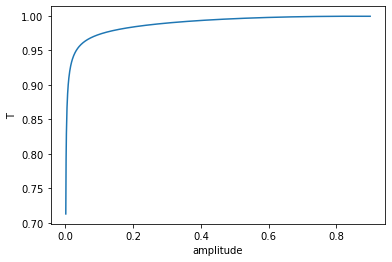

In [70]:
#defining potetial as given in part b
def V2(x):
    return 50*math.pi**2*(np.exp((x**2)/25)-1)
T_1=np.zeros(1000)
a=np.linspace(0.001,0.9,1000)   # small values of amplitudeto see the variation in T with smal amplitude
for i in range(1000):
    T_1[i]=tr(f,a[i],10**(-4),V2(a[i]),1000,V2)
    
plt.plot(a,T_1)
plt.xlabel("amplitude")
plt.ylabel("T")


